#### Import modules and read data

In [24]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_excel(os.getcwd() + '/Data/Superstore.xls')
data.shape

(9994, 21)

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### EDA and Preprocessing

In [5]:
data['Prep Time'] = data['Ship Date'] - data['Order Date']  # number of days between order placement and shipping

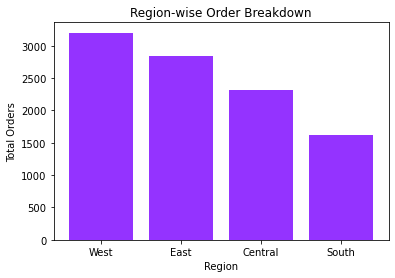

In [6]:
region_counts = data['Region'].value_counts()

plt.bar(region_counts.index, region_counts, color = '#9433ff')
plt.title('Region-wise Order Breakdown')
plt.xlabel('Region')
plt.ylabel('Total Orders')
plt.show()
plt.close()

In [7]:
# data['Sub-Category'].value_counts()

In [8]:
data.groupby(['Category', 'Sub-Category']).size()

Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           617
                 Furnishings      957
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        217
                 Labels           364
                 Paper           1370
                 Storage          846
                 Supplies         190
Technology       Accessories      775
                 Copiers           68
                 Machines         115
                 Phones           889
dtype: int64

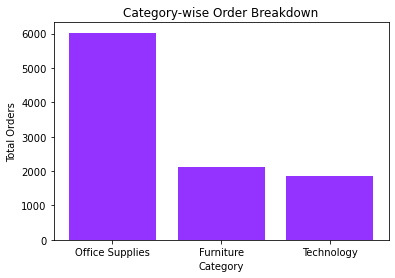

In [9]:
cat_counts = data['Category'].value_counts()

plt.bar(cat_counts.index, cat_counts, color = '#9433ff')
plt.title('Category-wise Order Breakdown')
plt.xlabel('Category')
plt.ylabel('Total Orders')
plt.show()
plt.close()

In [10]:
cat_region_orders = data.groupby(['Category', 'Region']).size()  # category + region order counts
cat_region_orders

Category         Region 
Furniture        Central     481
                 East        601
                 South       332
                 West        707
Office Supplies  Central    1422
                 East       1712
                 South       995
                 West       1897
Technology       Central     420
                 East        535
                 South       293
                 West        599
dtype: int64

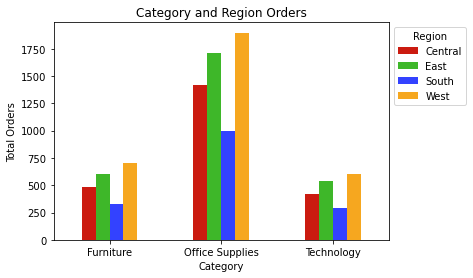

In [11]:
cat_region_orders.unstack().plot(kind = 'bar', color = ['#cb1b10', '#3eb729', '#3342ff', '#f6a71f'])
plt.title('Category and Region Orders')
plt.ylabel('Total Orders')
plt.xticks(rotation = 0)
plt.legend(loc = 2, bbox_to_anchor = (1, 1), title = 'Region')
plt.show()
plt.close()

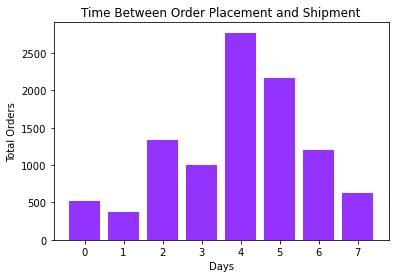

In [12]:
prep_counts = data['Prep Time'].value_counts()

plt.bar(prep_counts.reset_index()['index'].dt.total_seconds() / 86400, prep_counts, color = '#9433ff')  # resets index, converts col from days as a timedelta to seconds as a float, then divide to get number of days
plt.title('Time Between Order Placement and Shipment')
plt.xlabel('Days')
plt.ylabel('Total Orders')
plt.show()
plt.close()

In [13]:
data.groupby(['Region', 'Category', 'Prep Time']).size()

Region   Category    Prep Time
Central  Furniture   0 days        27
                     1 days        13
                     2 days        63
                     3 days        35
                     4 days       157
                                 ... 
West     Technology  3 days        59
                     4 days       151
                     5 days       124
                     6 days        72
                     7 days        48
Length: 96, dtype: int64

In [14]:
data.groupby(['Category', 'Prep Time']).size()

Category         Prep Time
Furniture        0 days        116
                 1 days         77
                 2 days        310
                 3 days        186
                 4 days        601
                 5 days        466
                 6 days        236
                 7 days        129
Office Supplies  0 days        310
                 1 days        221
                 2 days        765
                 3 days        627
                 4 days       1660
                 5 days       1310
                 6 days        749
                 7 days        384
Technology       0 days         93
                 1 days         71
                 2 days        259
                 3 days        192
                 4 days        513
                 5 days        393
                 6 days        218
                 7 days        108
dtype: int64

In [15]:
data.describe().iloc[:, 2 :]

,Sales,Quantity,Discount,Profit,Prep Time
count,9994.000000,9994.000000,9994.000000,9994.000000,9994
mean,229.858001,3.789574,0.156203,28.656896,3 days 22:59:46.311787
std,623.245101,2.225110,0.206452,234.260108,1 days 17:56:29.766161
min,0.444000,1.000000,0.000000,-6599.978000,0 days 00:00:00
25%,17.280000,2.000000,0.000000,1.728750,3 days 00:00:00
50%,54.490000,3.000000,0.200000,8.666500,4 days 00:00:00
75%,209.940000,5.000000,0.200000,29.364000,5 days 00:00:00
max,22638.480000,14.000000,0.800000,8399.976000,7 days 00:00:00


#### Subset Data

In [17]:
df = data.loc[data['Category'] == 'Furniture']

df = df.groupby('Order Date')['Sales'].sum().reset_index()

df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [18]:
df = df.sort_values(by = 'Order Date').set_index('Order Date')
df.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


#### Resample Data

In [19]:
month_s = df['Sales'].resample('MS').mean()  # average sales for each month

month_s['2017']

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

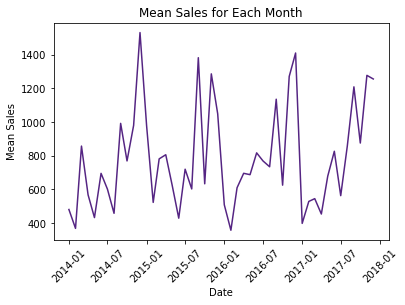

In [20]:
plt.plot(month_s.index, month_s, color = '#552583')
plt.title('Mean Sales for Each Month')
plt.xlabel('Date')
plt.ylabel('Mean Sales')
plt.xticks(rotation = 45)
plt.show()
plt.close()

#### Decompose Data

In [21]:
decomposition = sm.tsa.seasonal_decompose(month_s, model = 'additive')

In [22]:
# decomposition.resid
# decomposition.seasonal
# decomposition.trend
# decomposition.observed  # equilvalent to month_s

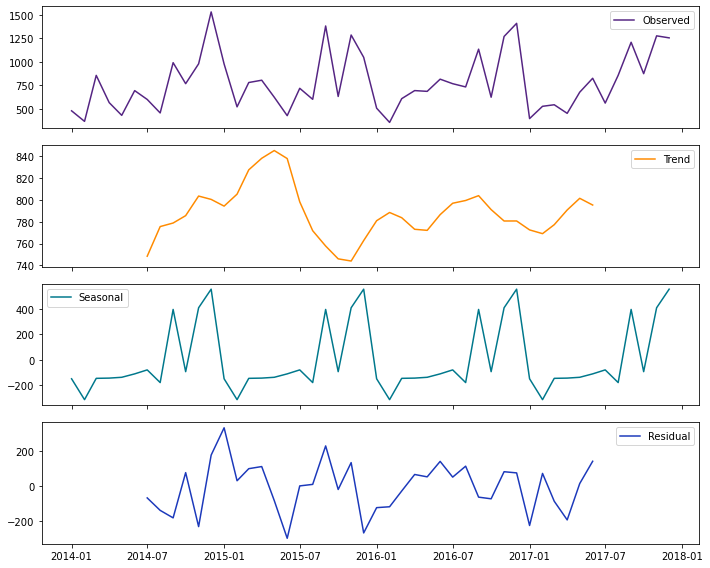

In [23]:
fig, ax = plt.subplots(4, 1, figsize = (10, 8), sharex = True)

ax[0].plot(decomposition.observed.index, decomposition.observed, color = '#552583')
ax[0].legend(['Observed'])

ax[1].plot(decomposition.trend.index, decomposition.trend, color = '#ff8b00', label = 'Trend')
ax[1].legend(['Trend'])

ax[2].plot(decomposition.seasonal.index, decomposition.seasonal, color = '#00788c', label = 'Seasonal')
ax[2].legend(['Seasonal'])

ax[3].plot(decomposition.resid.index, decomposition.resid, color = '#1c39bb', label = 'Residual')
ax[3].legend(['Residual'])

fig.tight_layout(h_pad = 1)
plt.show()
plt.close()

#### ARIMA

In [29]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

Grid search:

In [35]:
min_value, min_pdq, min_seasonal_pdq = float('inf'), None, None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIsm.tsa.statespace.SARIMAXMAX(month_s, order = param, seasonal_order = param_seasonal, enforce_stationary = False, enforce_invertibility = False)
            
            res = model.fit()
            
            print('ARIMA {}x{} AIC:{}'.format(param, param_seasonal, res.aic))
            
            if res.aic < min_value:
                min_value = res.aic
                min_pdq = param
                min_seasonal_pdq = param_seasonal
            
        except:
            continue

ARIMA (0, 0, 0)x(0, 0, 0, 12) AIC:784.7193402038779


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 0)x(0, 0, 1, 12) AIC:2098.0076939123373
ARIMA (0, 0, 0)x(0, 1, 0, 12) AIC:495.3709027487691
ARIMA (0, 0, 0)x(0, 1, 1, 12) AIC:489.83053264644315
ARIMA (0, 0, 0)x(1, 0, 0, 12) AIC:691.7786646598138


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 0)x(1, 0, 1, 12) AIC:1682.1189016358871
ARIMA (0, 0, 0)x(1, 1, 0, 12) AIC:491.2539819426887
ARIMA (0, 0, 0)x(1, 1, 1, 12) AIC:491.8095630486907
ARIMA (0, 0, 1)x(0, 0, 0, 12) AIC:751.0635462763042


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1)x(0, 0, 1, 12) AIC:1958.5705798770973
ARIMA (0, 0, 1)x(0, 1, 0, 12) AIC:497.0445558719422
ARIMA (0, 0, 1)x(0, 1, 1, 12) AIC:491.6640771286917
ARIMA (0, 0, 1)x(1, 0, 0, 12) AIC:689.6572888821618


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1)x(1, 0, 1, 12) AIC:1855.4162418758438
ARIMA (0, 0, 1)x(1, 1, 0, 12) AIC:493.1979865785861
ARIMA (0, 0, 1)x(1, 1, 1, 12) AIC:493.6293522351333
ARIMA (0, 1, 0)x(0, 0, 0, 12) AIC:691.6686053888744


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 0)x(0, 0, 1, 12) AIC:1746.431392763681
ARIMA (0, 1, 0)x(0, 1, 0, 12) AIC:501.19171493761394
ARIMA (0, 1, 0)x(0, 1, 1, 12) AIC:498.22118357211696
ARIMA (0, 1, 0)x(1, 0, 0, 12) AIC:672.7905898083135


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 0)x(1, 0, 1, 12) AIC:1798.7573456614396
ARIMA (0, 1, 0)x(1, 1, 0, 12) AIC:500.107047424315
ARIMA (0, 1, 0)x(1, 1, 1, 12) AIC:500.02052123201236
ARIMA (0, 1, 1)x(0, 0, 0, 12) AIC:679.3515257502459


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1)x(0, 0, 1, 12) AIC:1869.8078302650251
ARIMA (0, 1, 1)x(0, 1, 0, 12) AIC:489.6345113973268
ARIMA (0, 1, 1)x(0, 1, 1, 12) AIC:482.83195279021504
ARIMA (0, 1, 1)x(1, 0, 0, 12) AIC:656.5174592665998


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1)x(1, 0, 1, 12) AIC:1829.291056288319
ARIMA (0, 1, 1)x(1, 1, 0, 12) AIC:484.7116747699362
ARIMA (0, 1, 1)x(1, 1, 1, 12) AIC:484.82790254065975
ARIMA (1, 0, 0)x(0, 0, 0, 12) AIC:707.8812143773628


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 0)x(0, 0, 1, 12) AIC:1945.563883676345
ARIMA (1, 0, 0)x(0, 1, 0, 12) AIC:496.9636902231513
ARIMA (1, 0, 0)x(0, 1, 1, 12) AIC:491.64345916798266
ARIMA (1, 0, 0)x(1, 0, 0, 12) AIC:682.5313938751426
ARIMA (1, 0, 0)x(1, 0, 1, 12) AIC:8.0
ARIMA (1, 0, 0)x(1, 1, 0, 12) AIC:493.18796239422244
ARIMA (1, 0, 0)x(1, 1, 1, 12) AIC:493.60743074359306
ARIMA (1, 0, 1)x(0, 0, 0, 12) AIC:697.3491224675652


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1)x(0, 0, 1, 12) AIC:1810.8644435290153
ARIMA (1, 0, 1)x(0, 1, 0, 12) AIC:498.8527554530689
ARIMA (1, 0, 1)x(0, 1, 1, 12) AIC:493.5574635772238


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1)x(1, 0, 0, 12) AIC:673.3008254961903
ARIMA (1, 0, 1)x(1, 0, 1, 12) AIC:1667.3396293282137
ARIMA (1, 0, 1)x(1, 1, 0, 12) AIC:495.0826671287641
ARIMA (1, 0, 1)x(1, 1, 1, 12) AIC:495.3239054209247
ARIMA (1, 1, 0)x(0, 0, 0, 12) AIC:684.9765838986986


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 0)x(0, 0, 1, 12) AIC:1699.931291843604
ARIMA (1, 1, 0)x(0, 1, 0, 12) AIC:494.3112171937164
ARIMA (1, 1, 0)x(0, 1, 1, 12) AIC:490.62427521215596
ARIMA (1, 1, 0)x(1, 0, 0, 12) AIC:665.2664123034491


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 0)x(1, 0, 1, 12) AIC:1435.1108352518345
ARIMA (1, 1, 0)x(1, 1, 0, 12) AIC:491.85420116840373
ARIMA (1, 1, 0)x(1, 1, 1, 12) AIC:492.5754415768328
ARIMA (1, 1, 1)x(0, 0, 0, 12) AIC:678.4136280159307


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 1)x(0, 0, 1, 12) AIC:1866.103447431376
ARIMA (1, 1, 1)x(0, 1, 0, 12) AIC:490.8791080244524
ARIMA (1, 1, 1)x(0, 1, 1, 12) AIC:484.59366780408317
ARIMA (1, 1, 1)x(1, 0, 0, 12) AIC:656.5344048752696


c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 1)x(1, 0, 1, 12) AIC:1877.6220248790223
ARIMA (1, 1, 1)x(1, 1, 0, 12) AIC:486.56319812000737
ARIMA (1, 1, 1)x(1, 1, 1, 12) AIC:486.58215038979324


In [36]:
selected_model = sm.tsa.statespace.SARIMAX(month_s, order = min_pdq, seasonal_order = min_seasonal_pdq, enforce_stationary = False, enforce_invertibility = False)

res = selected_model.fit()

res.summary().tables[1]

c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: invalid value encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)
c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\samar\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_eq

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,1.0000,-0,-inf,0.000,1.000,1.000
ar.S.L12,1.0000,-0,-inf,0.000,1.000,1.000
ma.S.L12,-4.239e+12,5e+06,-8.47e+05,0.000,-4.24e+12,-4.24e+12
sigma2,7.286e+08,4130.615,1.76e+05,0.000,7.29e+08,7.29e+08


LinAlgError: singular matrix

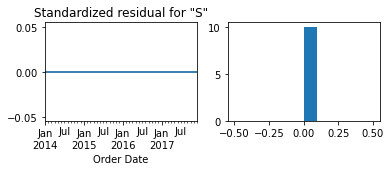

In [37]:
res.plot_diagnostics()